## Name: David Geng

## Unsupervised Learning: Cluster Analysis using K-Means

### Loading Libraries

In [1]:
# importing the packages
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns

### Loading Data

In [2]:
# # importing data
# from google.colab import files
# upload = files.upload()

In [26]:
# read the dataset
df = pd.read_csv('utilities.csv')

In [27]:
# copy of df
df1 = df.copy()

In [4]:
# viewing top rows
df.head()

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


In [5]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        22 non-null     object 
 1   Fixed_charge   22 non-null     float64
 2   RoR            22 non-null     float64
 3   Cost           22 non-null     int64  
 4   Load_factor    22 non-null     float64
 5   Demand_growth  22 non-null     float64
 6   Sales          22 non-null     int64  
 7   Nuclear        22 non-null     float64
 8   Fuel_Cost      22 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.7+ KB


In [6]:
# using describe function
df.describe()

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.00000,22.000000
mean,1.114091,10.736364,168.181818,56.977273,3.240909,8914.045455,12.00000,1.102727
std,0.184511,2.244049,41.191349,4.461148,3.118250,3549.984031,16.79192,0.556098
min,0.750000,6.400000,96.000000,49.800000,-2.200000,3300.000000,0.00000,0.309000
25%,1.042500,9.200000,148.500000,53.775000,1.450000,6458.250000,0.00000,0.630000
50%,1.110000,11.050000,170.500000,56.350000,3.000000,8024.000000,0.00000,0.960000
75%,1.190000,12.350000,195.750000,60.300000,5.350000,10128.250000,24.60000,1.516250
max,1.490000,15.400000,252.000000,67.600000,9.200000,17441.000000,50.20000,2.116000


In [7]:
# dropping Company
df = df.iloc[:, 1:]

In [8]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fixed_charge   22 non-null     float64
 1   RoR            22 non-null     float64
 2   Cost           22 non-null     int64  
 3   Load_factor    22 non-null     float64
 4   Demand_growth  22 non-null     float64
 5   Sales          22 non-null     int64  
 6   Nuclear        22 non-null     float64
 7   Fuel_Cost      22 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 1.5 KB


## K-Means Clustering Analysis

In [9]:
# standardization the variable
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.head()

,0,1,2,3,4,5,6,7
0,-0.300057,-0.700750,-0.426938,-0.591310,-0.538611,0.046983,-0.731447,-0.873765
1,-1.243092,-0.199030,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436
2,1.752432,2.127130,-1.371171,-0.912516,0.052220,0.085906,-0.731447,-0.082323
3,-0.521947,0.211469,-0.004518,-0.224218,-0.965322,-0.718219,1.359271,-0.741244
4,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470


In [10]:
# computing k-means clustering
kmeans = KMeans(n_clusters = 5, random_state = 0)
k_pred = kmeans.fit(df_scaled)
k_pred

KMeans(n_clusters=5, random_state=0)

In [29]:
# add clusters into in df1
df1['cluster'] = k_pred.labels_
df1

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost,cluster
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628,2
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555,1
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058,2
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700,0
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044,3
5,Florida,1.32,13.5,111,60.0,-2.2,11127,22.5,1.241,2
6,Hawaiian,1.22,12.2,175,67.6,2.2,7642,0.0,1.652,1
7,Idaho,1.10,9.2,245,57.0,3.3,13082,0.0,0.309,4
8,Kentucky,1.34,13.0,168,60.4,7.2,8406,0.0,0.862,2
9,Madison,1.12,12.4,197,53.0,2.7,6455,39.2,0.623,0


In [11]:
# cluster centroids
df_cluster = pd.DataFrame(k_pred.cluster_centers_, columns = df.columns)
pd.set_option('display.precision', 3)
df_cluster

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,-0.012,0.339,0.224,-0.366,0.170,-0.411,1.602,-0.609
1,-0.633,-0.640,0.207,1.175,0.058,-0.758,-0.381,1.204
2,0.516,0.798,-1.009,-0.345,-0.501,0.360,-0.536,-0.420
3,2.085,-0.883,0.592,-1.325,-0.736,-1.619,0.219,1.732
4,-0.614,-0.853,1.370,-0.492,1.015,1.900,-0.731,-0.988


<AxesSubplot:ylabel='Fixed_charge'>

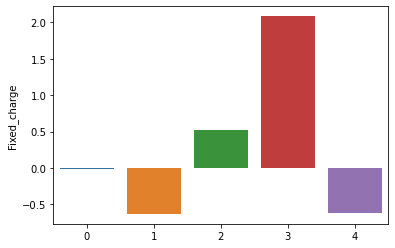

In [12]:
# Fixed_charge
sns.barplot(data = df_cluster, x = df_cluster.index, y = 'Fixed_charge')

<AxesSubplot:ylabel='RoR'>

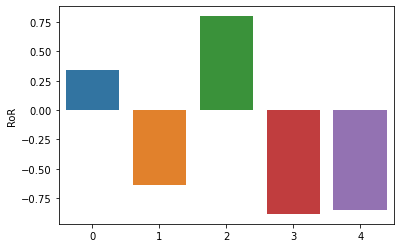

In [13]:
# RoR
sns.barplot(data = df_cluster, x = df_cluster.index, y = 'RoR')

<AxesSubplot:ylabel='Cost'>

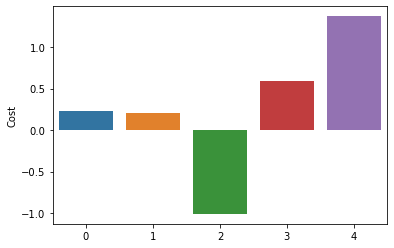

In [14]:
# HW Cost
sns.barplot(data = df_cluster, x = df_cluster.index, y = 'Cost')

<AxesSubplot:ylabel='Load_factor'>

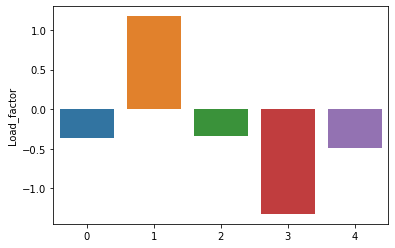

In [15]:
# HW Load_factor
sns.barplot(data = df_cluster, x = df_cluster.index, y = 'Load_factor')

<AxesSubplot:ylabel='Demand_growth'>

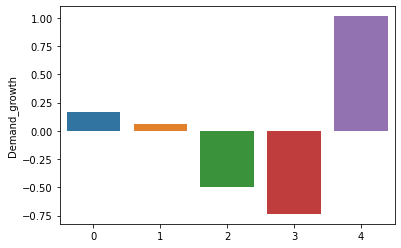

In [16]:
# HW Demand_growth
sns.barplot(data = df_cluster, x = df_cluster.index, y = 'Demand_growth')

<AxesSubplot:ylabel='Sales'>

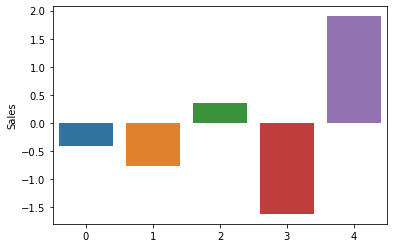

In [17]:
# HW Sales
sns.barplot(data = df_cluster, x = df_cluster.index, y = 'Sales')

<AxesSubplot:ylabel='Nuclear'>

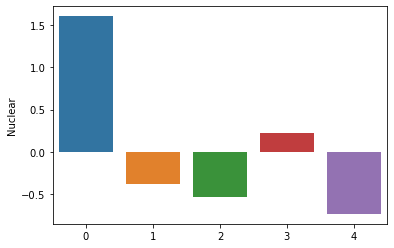

In [18]:
# HW Nuclear
sns.barplot(data = df_cluster, x = df_cluster.index, y = 'Nuclear')

<AxesSubplot:ylabel='Fuel_Cost'>

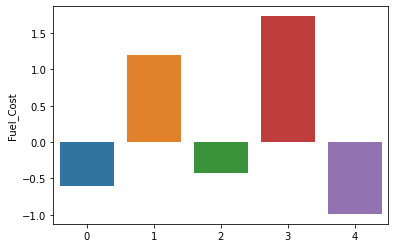

In [19]:
# HW Fuel_Cost
sns.barplot(data = df_cluster, x = df_cluster.index, y = 'Fuel_Cost')

### Choosing K: Elbow Method

In [20]:
# Computing inertia
distortions = []
K = range(2, 10)
for i in K:
    km = KMeans(n_clusters = i)
    km.fit(df_scaled)
    distortions.append(km.inertia_)

In [21]:
print(distortions)

[137.44982253132122, 106.55401965419406, 84.21096768855101, 70.61618681662719, 63.318452380888935, 53.40116562521618, 47.45529018151178, 37.9771388408972]


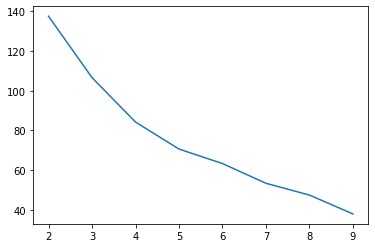

In [22]:
# plot inertia
plt.plot(K, distortions)